In [1]:
from active_vision import ActiveLearner

al = ActiveLearner(name="cycle-1")

In [2]:
al.load_model(model="timm/convnext_tiny.fb_in22k", pretrained=True)

2025-02-08 00:44:04.661 | INFO     | active_vision.core:_detect_optimal_device:87 - CUDA GPU detected - will load model on GPU
2025-02-08 00:44:04.662 | INFO     | active_vision.core:load_model:73 - Loading a pretrained timm model `timm/convnext_tiny.fb_in22k` on `cuda`


In [3]:
import pandas as pd

train_set = pd.read_parquet("data/training_samples.parquet")
evaluation_set = pd.read_parquet("data/evaluation_samples.parquet")

In [4]:
from fastai.vision.all import aug_transforms

al.load_dataset(
    train_set,
    filepath_col="filepath",
    label_col="label",
    image_size=320,
    batch_tfms=aug_transforms(size=224),
)

2025-02-08 00:44:04.688 | INFO     | active_vision.core:load_dataset:125 - Loading dataset from `filepath` and `label` columns
2025-02-08 00:44:05.136 | INFO     | active_vision.core:load_dataset:159 - Creating new learner
2025-02-08 00:44:06.146 | INFO     | active_vision.core:_optimize_learner:100 - Enabled mixed precision training
2025-02-08 00:44:06.146 | INFO     | active_vision.core:_finalize_setup:109 - Training set size: 3871
2025-02-08 00:44:06.147 | INFO     | active_vision.core:_finalize_setup:110 - Validation set size: 967
2025-02-08 00:44:06.147 | INFO     | active_vision.core:_finalize_setup:111 - Done. Ready to train.


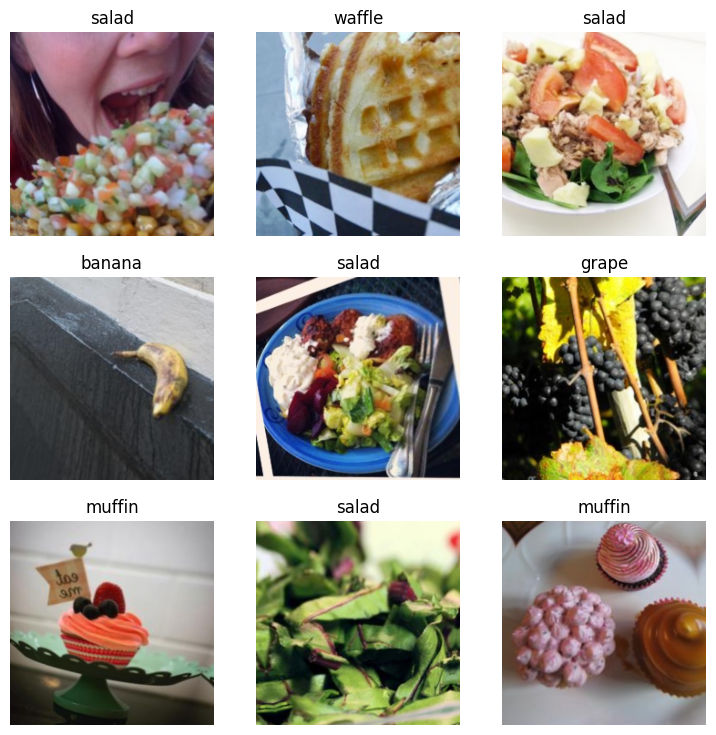

In [5]:
al.show_batch()

2025-02-08 00:44:06.695 | INFO     | active_vision.core:lr_find:200 - Finding optimal learning rate


2025-02-08 00:44:11.021 | INFO     | active_vision.core:lr_find:202 - Optimal learning rate: 0.0020892962347716093


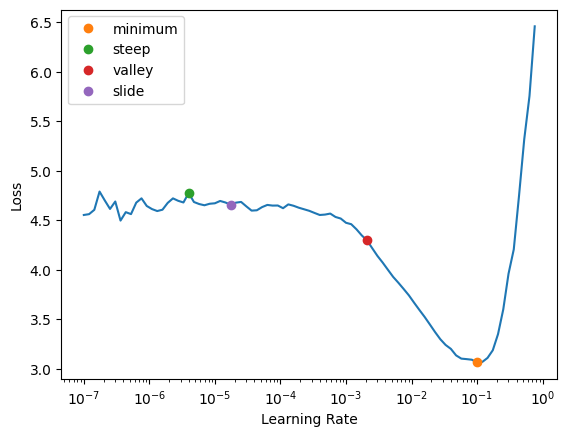

In [6]:
al.lr_find()

2025-02-08 00:44:11.324 | INFO     | active_vision.core:train:213 - Training head for 1 epochs
2025-02-08 00:44:11.325 | INFO     | active_vision.core:train:214 - Training model end-to-end for 3 epochs
2025-02-08 00:44:11.326 | INFO     | active_vision.core:train:215 - Learning rate: 0.005 with one-cycle learning rate scheduler


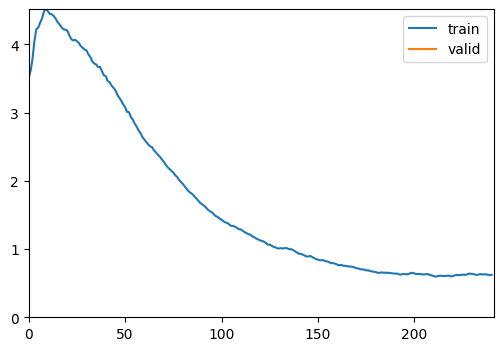

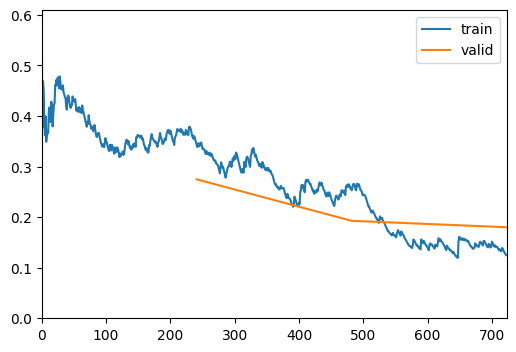

In [7]:
al.train(epochs=3, lr=5e-3)

## Top Loss

Run the inference on the dataset to get the top loss samples.

In [8]:
loss_df = al.evaluate(al.dataset, filepath_col="filepath", label_col="label", batch_size=128)


2025-02-08 00:45:15.026 | INFO     | active_vision.core:evaluate:318 - Accuracy: 98.70%


In [9]:
loss_df = loss_df.sort_values(by="loss", ascending=False)
loss_df.head(50)

filepath       label  pred_label  pred_conf  \
2449   data/ice cream/2449.jpg   ice cream      muffin   0.125068   
3139      data/orange/3139.jpg      orange       juice   0.125118   
1410      data/cookie/1410.jpg      cookie      muffin   0.118468   
4129  data/strawberry/4129.jpg  strawberry      orange   0.101275   
3279   data/pineapple/3279.jpg   pineapple       juice   0.124922   
718          data/cake/718.jpg        cake      muffin   0.124878   
804         data/candy/804.jpg       candy       juice   0.124827   
3323   data/pineapple/3323.jpg   pineapple   ice cream   0.124297   
2940      data/muffin/2940.jpg      muffin        cake   0.081927   
1398      data/cookie/1398.jpg      cookie       salad   0.120781   
2416   data/ice cream/2416.jpg   ice cream      muffin   0.121203   
146         data/apple/146.jpg       apple      orange   0.124323   
3470   data/pineapple/3470.jpg   pineapple       grape   0.123451   
3744     data/pretzel/3744.jpg     pretzel      cookie   0.109596   
2931      data/muffin/2931.jpg      muffin   ice cream   0.124095   
510          data/cake/510.jpg        cake      muffin   0.123084   
2941      data/muffin/2941.jpg      muffin        cake   0.094058   
503          data/cake/503.jpg        cake   ice cream   0.077482   
3147      data/orange/3147.jpg      orange      cookie   0.092384   
4126  data/strawberry/4126.jpg  strawberry        cake   0.087539   
1475      data/cookie/1475.jpg      cookie     hot dog   0.069148   
3274   data/pineapple/3274.jpg   pineapple      banana   0.104612   
1443      data/cookie/1443.jpg      cookie     pretzel   0.069663   
3863       data/salad/3863.jpg       salad     hot dog   0.121117   
1125      data/carrot/1125.jpg      carrot       salad   0.092965   
3870       data/salad/3870.jpg       salad   ice cream   0.084644   
4049       data/salad/4049.jpg       salad  strawberry   0.119296   
483        data/banana/483.jpg      banana       salad   0.073871   
4075       data/salad/4075.jpg       salad       juice   0.100825   
2432   data/ice cream/2432.jpg   ice cream       juice   0.074639   
1460      data/cookie/1460.jpg      cookie     popcorn   0.101674   
1545    data/doughnut/1545.jpg    doughnut  strawberry   0.095723   
3260   data/pineapple/3260.jpg   pineapple  strawberry   0.106199   
1915       data/grape/1915.jpg       grape  watermelon   0.107361   
4042       data/salad/4042.jpg       salad       apple   0.111082   
4406      data/waffle/4406.jpg      waffle      cookie   0.082152   
2870      data/muffin/2870.jpg      muffin        cake   0.106637   
1839       data/grape/1839.jpg       grape        cake   0.075246   
3252   data/pineapple/3252.jpg   pineapple       juice   0.103028   
3229      data/orange/3229.jpg      orange       apple   0.100117   
4033       data/salad/4033.jpg       salad     hot dog   0.082868   
2962      data/muffin/2962.jpg      muffin        cake   0.100465   
1490      data/cookie/1490.jpg      cookie   ice cream   0.080233   
2282   data/ice cream/2282.jpg   ice cream       salad   0.087893   
3405   data/pineapple/3405.jpg   pineapple      orange   0.083389   
774         data/candy/774.jpg       candy       candy   0.061292   
2742       data/juice/2742.jpg       juice       apple   0.096247   
3150      data/orange/3150.jpg      orange       apple   0.094106   
3374   data/pineapple/3374.jpg   pineapple     popcorn   0.081653   
1390      data/cookie/1390.jpg      cookie        cake   0.093362   

                                                  probs      loss  
2449  [7.219683993753279e-06, 1.86670949915424e-05, ...  8.416824  
3139  [1.96086375581217e-07, 1.578678734404093e-07, ...  7.961312  
1410  [1.5076525414770003e-06, 5.773781595053151e-06...  7.762379  
4129  [1.3527422879633377e-06, 0.0021084246691316366...  6.982127  
3279  [1.1066877192433822e-07, 1.8016018543676182e-0...  6.181763  
718   [1.6235714994650152e-08, 1.506924292016265e-07...  6.010271  
804   [4.0165673453884665e


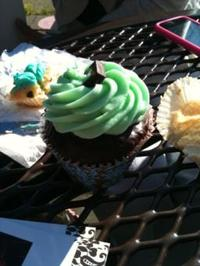
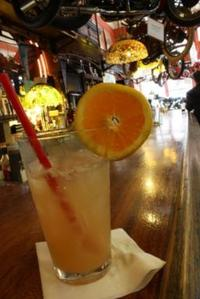
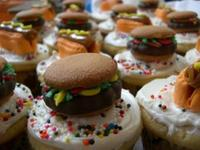
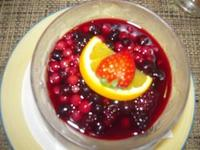
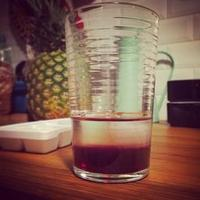
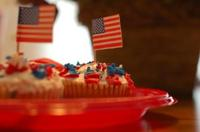
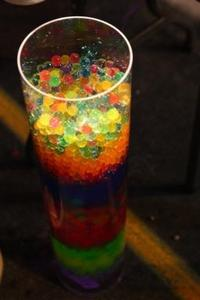
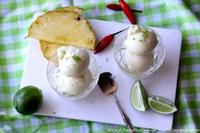
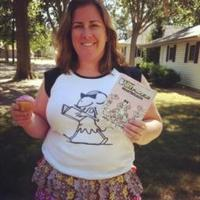
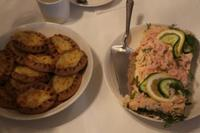
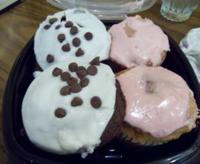
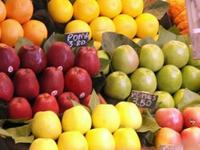
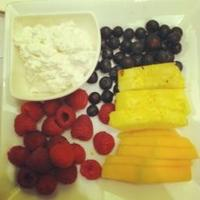
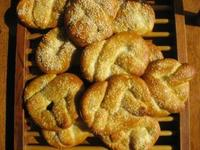
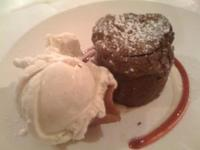
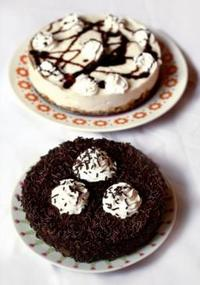
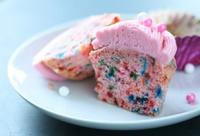
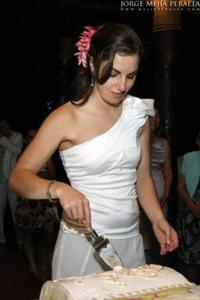
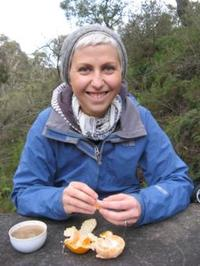
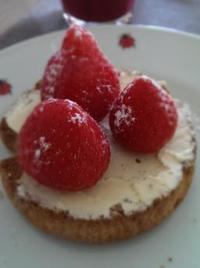
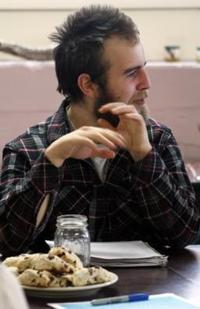
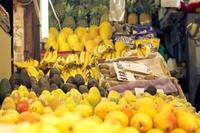
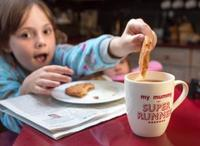
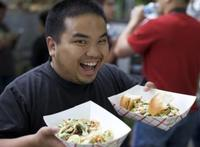
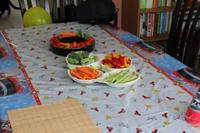
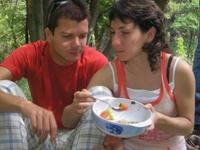
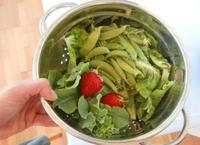
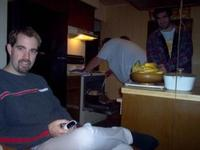
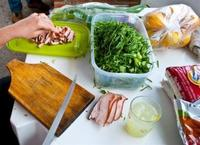
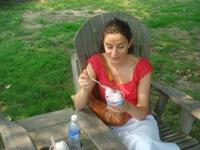
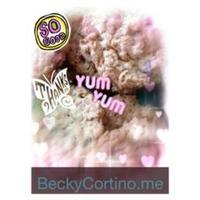
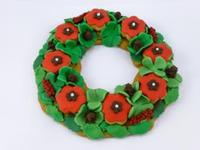
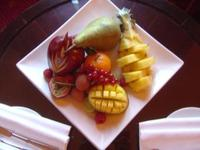
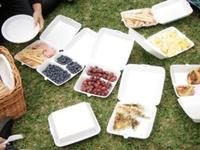
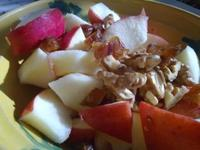
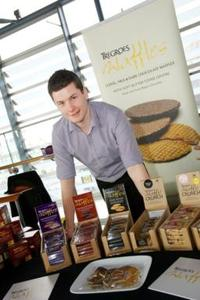
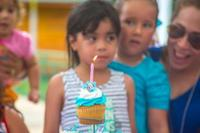
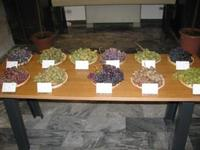
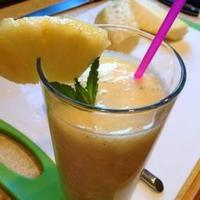
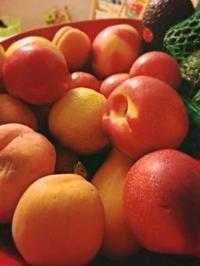
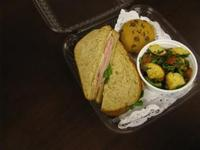
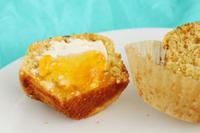
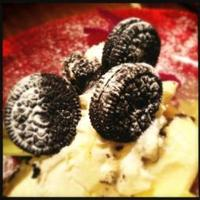
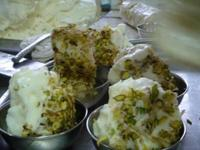
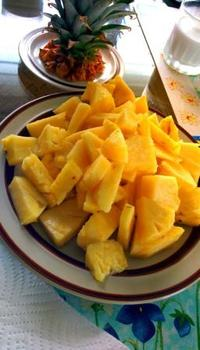
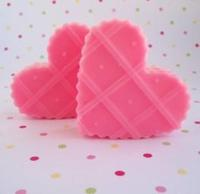
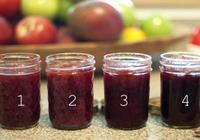
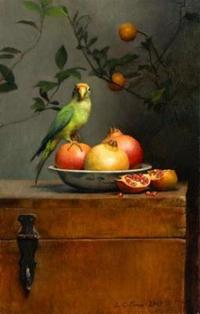
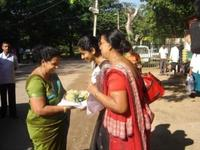
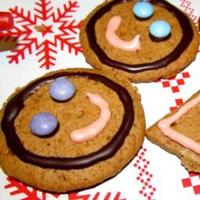

In [10]:
from active_vision.utils import show_interactive_table

show_interactive_table(loss_df.head(50))

## Label the top loss samples

In [ ]:
loss_df["strategy"] = "Loss"
loss_df["score"] = loss_df["loss"]

al.label(loss_df.head(50), output_filename="top_loss_samples.parquet")